<a href="https://colab.research.google.com/github/nitish-pandey/Spam-Classification/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of contents

1. Basic Imports

2. Data Loading and Visualization

3. Data Cleaning

4. Feature Extraction

5. Machine-Learning Implementation

6. Save and Reuse [ For Deployment ]

# 1. Basic Imports

In [1]:
import os
from os import remove
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re

import wordcloud

from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator

NLTK

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.naive_bayes import GaussianNB,MultinomialNB

# 2. Data Loading and Visualization

In [4]:
# loading the data

dataset=pd.read_csv(r'/content/spam.csv',encoding='latin-1')
dataset.iloc[:10,:2]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
# showing value counts of ham and spam
dataset['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

Pie-Chart

[]

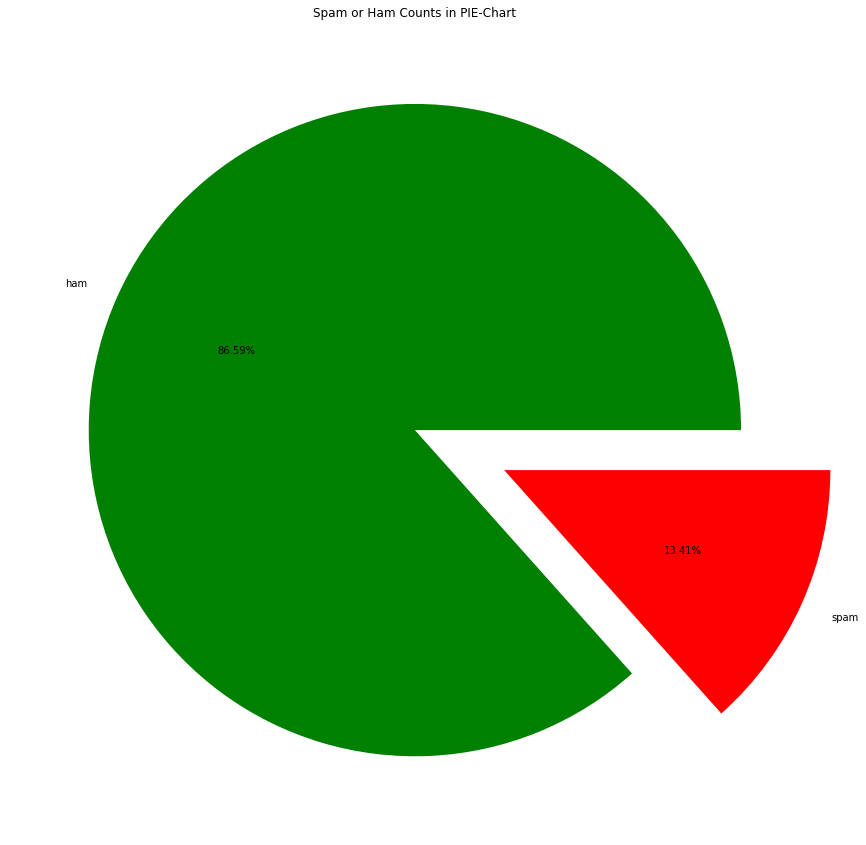

In [6]:
# Visualizing the count of spam and ham messages in pie-chart

plt.figure(figsize=(15,15))
plt.title('Spam or Ham Counts in PIE-Chart')
plt.pie(dataset['v1'].value_counts(),labels=dataset['v1'].unique(),explode=[0,0.3],autopct='%1.2f%%',colors=['green','red'])
plt.savefig('pie1.png',dpi=400,bbox_inches='tight')
plt.plot()

Balancing the Imbalanced data

In [7]:
spams=dataset[dataset['v1']=='spam'].copy()
hams=dataset[dataset['v1']=='ham'].copy()

data=pd.concat([spams,hams[:1000]],axis=0)
data[:5],data[-5:]


(      v1                                                 v2
 2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
 5   spam  FreeMsg Hey there darling it's been 3 week's n...
 8   spam  WINNER!! As a valued network customer you have...
 9   spam  Had your mobile 11 months or more? U R entitle...
 11  spam  SIX chances to win CASH! From 100 to 20,000 po...,
        v1                                                 v2
 1174  ham  Yay! You better not have told that to 5 other ...
 1175  ham  Horrible u eat macs eat until u forgot abt me ...
 1176  ham  Did he say how fantastic I am by any chance, o...
 1177  ham                         Just nw i came to hme da..
 1178  ham  I'm outside islands, head towards hard rock an...)

In [8]:
data=data.sample(frac=1)
data=data.reset_index()
data=data.drop(['index'],axis=1)
data[:10]

,v1,v2
0,ham,I taught that Ranjith sir called me. So only i...
1,ham,I guess that's why you re worried. You must kn...
2,ham,Thanks a lot for your wishes on my birthday. T...
3,ham,Is xy going 4 e lunch?
4,spam,You are being ripped off! Get your mobile cont...
5,ham,I've not called you in a while. This is hoping...
6,ham,Ummma.will call after check in.our life will b...
7,spam,U have a secret admirer who is looking 2 make ...
8,ham,Ok ill tell the company
9,spam,SplashMobile: Choose from 1000s of gr8 tones e...


[]

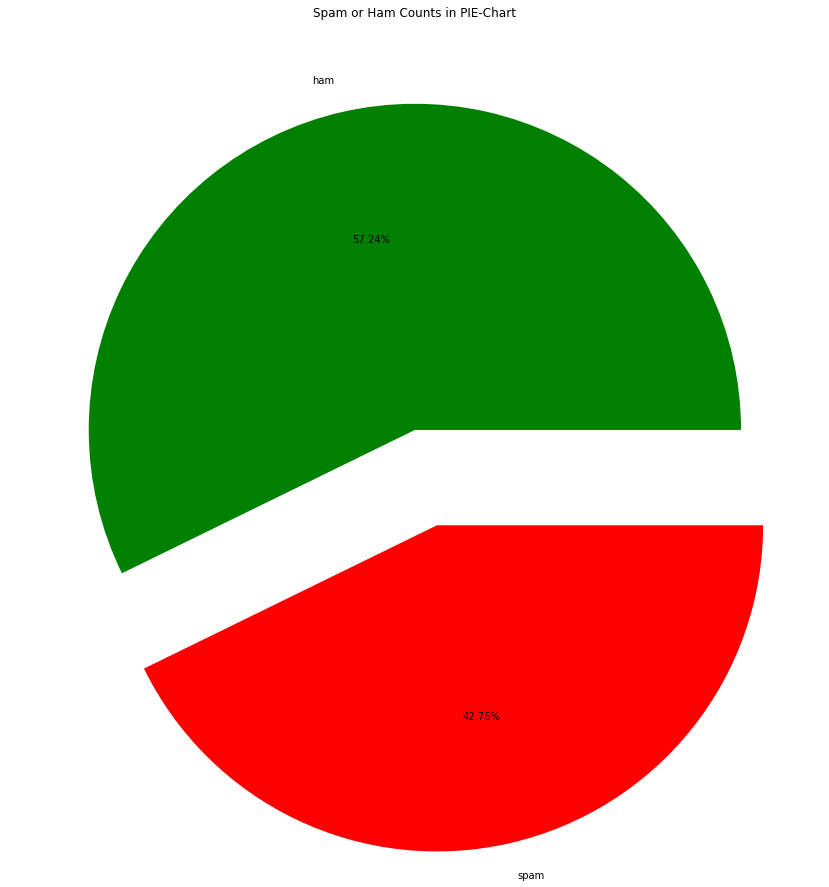

In [9]:
# Visualizing the count of spam and ham messages in pie-chart after balancing the data

plt.figure(figsize=(15,15))
plt.title('Spam or Ham Counts in PIE-Chart')
plt.pie(data['v1'].value_counts(),labels=data['v1'].unique(),explode=[0,0.3],autopct='%1.2f%%',colors=['green','red'])
plt.savefig('pie2.png',dpi=400,bbox_inches='tight')
plt.plot()

Wordcloud

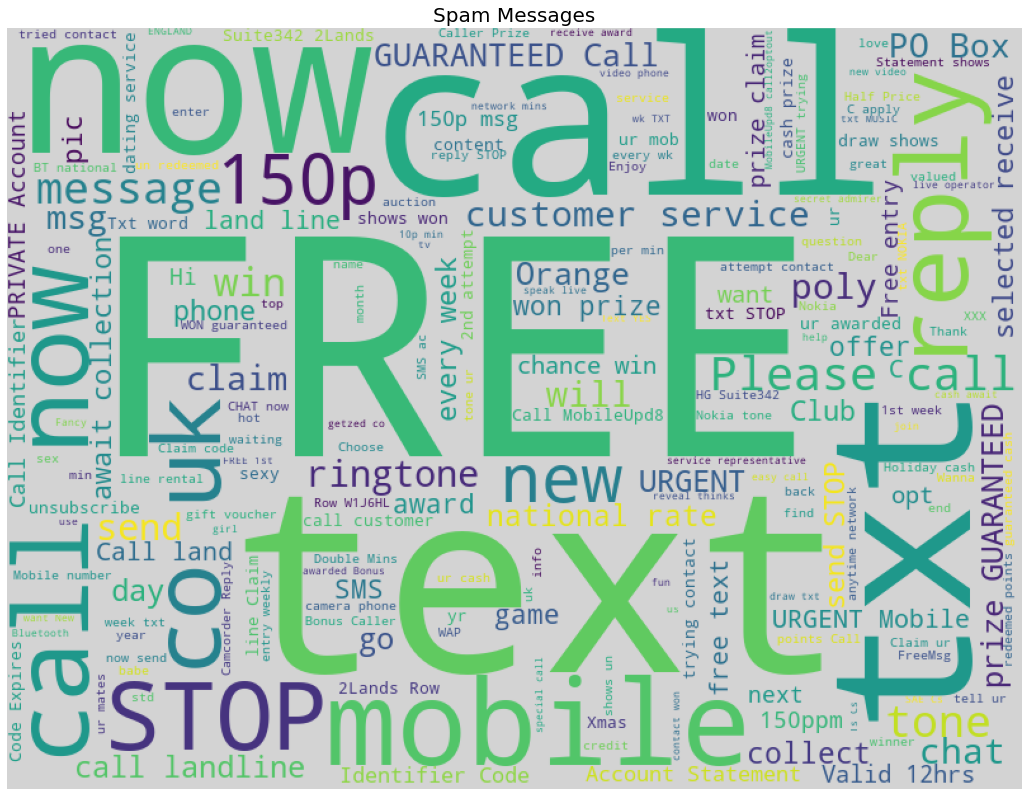

In [10]:
text = ' '.join(spams['v2'].astype(str).tolist())
stop = set(wordcloud.STOPWORDS)
    
fig_wordcloud = wordcloud.WordCloud(stopwords=stop,background_color='lightgrey',
                colormap='viridis', width=800, height=600).generate(text)
    
plt.figure(figsize=(20,14), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Spam Messages', fontsize=20 )
plt.savefig('wordcloud1.png',dpi=400,bbox_inches='tight')
plt.show()

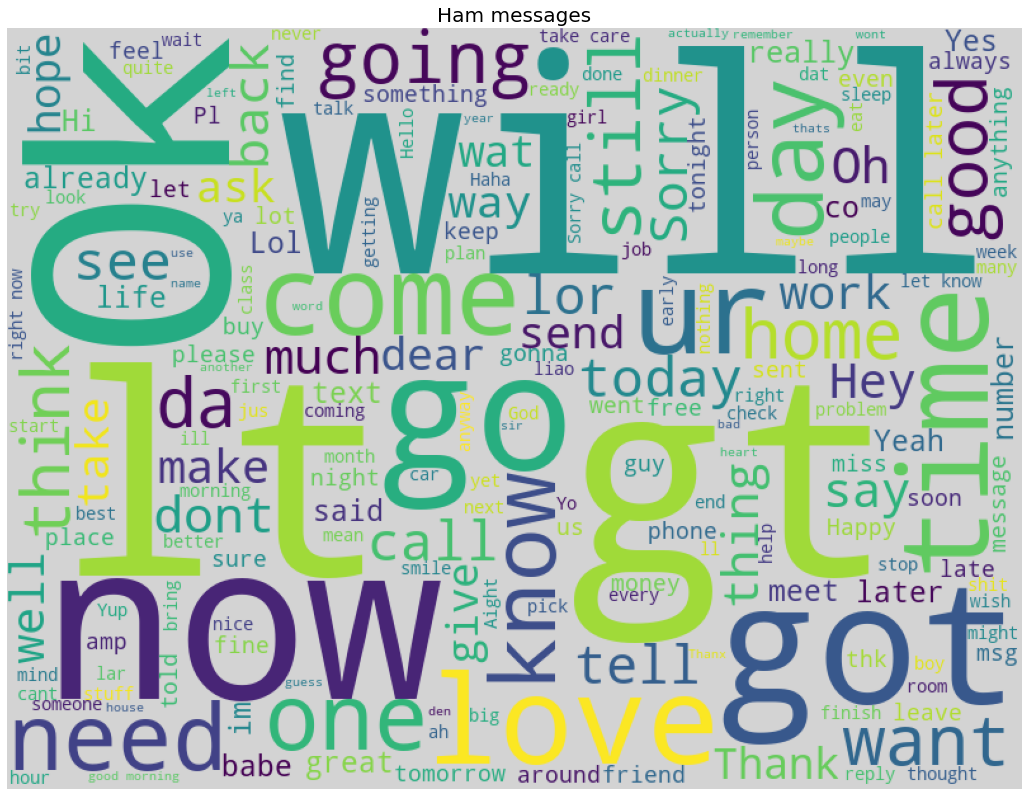

In [11]:
text = ' '.join(hams['v2'].astype(str).tolist())
stop = set(wordcloud.STOPWORDS)
    
fig_wordcloud = wordcloud.WordCloud(stopwords=stop,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
plt.figure(figsize=(20,14), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Ham messages', fontsize=20 )
plt.savefig('wordcloud2.png',dpi=400,bbox_inches='tight')
plt.show()

Removing Null entries and duplicate rows

In [12]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.reset_index(inplace=True)
dataset.shape

(5169, 3)

In [13]:
X=data['v2']
y=data['v1']

y=pd.get_dummies(y,drop_first=True)
print(y.head())

   spam
0     0
1     0
2     0
3     0
4     1


# 3. Data Cleaning

In [14]:
#stopwords of english language
stopword=set(stopwords.words('english'))

lematizer=WordNetLemmatizer()

n,=X.shape
n

1747

In [15]:
# Data Cleaning

def clean(X):

    # replacing all characters except alphabets with space
    temp=re.sub('[^a-zA-Z]',' ',X)

    # Lowering all the characters
    temp=temp.lower()

    # Splitting the sentences into set of words
    temp=temp.split()

    # lemmatize the word if it is not present in stopwords
    temp=[lematizer.lemmatize(word) for word in temp if word not in set(stopword)]

    #Joining the Lemmatized words with space
    temp=' '.join(temp)

    # Returning the cleaned sentences
    return temp
    


In [16]:
for i in range(len(X)):
    X[i]=clean(X[i])

X[:3]

0    taught ranjith sir called sm like becaus he ve...
1    guess worried must know way body repair quite ...
2    thanks lot wish birthday thanks making birthda...
Name: v2, dtype: object

# 4. Feature Extraction

In [17]:
# Vocabulary size
voc_size=5000

# Maximum sentence length
sent_len=15

In [18]:
tfidf=sklearn.feature_extraction.text.TfidfVectorizer(max_features=voc_size)

tfidf.fit(X)

encoded=tfidf.transform(X)

encoded[:3]

<3x3682 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

Splitting the Dataset into training and testing

In [19]:
# splitting the data in ratio of 70 : 30 

X_train,X_test,y_train,y_test=train_test_split(encoded,y,test_size=0.3)

In [20]:
from sklearn.naive_bayes import MultinomialNB

# 5.Machine learning implementation

In [21]:
# Using Multinomial naive bayes
model=MultinomialNB()

model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

Performance Analysis

In [22]:
y_pred =model.predict(X_test)
report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       319
           1       0.93      0.92      0.92       206

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.94      0.94      0.94       525



Confusion Matrix

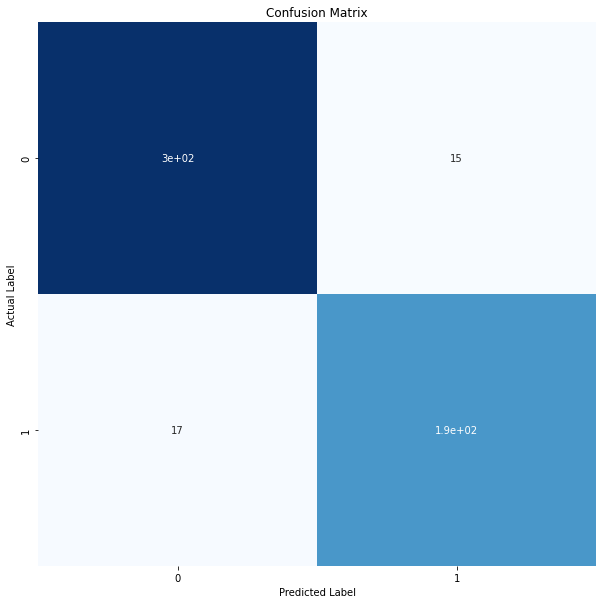

In [23]:
plt.figure(figsize=(10,10))
plt.title('Confusion Matrix')
sns.heatmap(matrix,annot=True,cmap='Blues',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('matrix.png',dpi=400,bbox_inches='tight')

# 6. Saving the Model

In [24]:
import joblib

# Saving the Model using joblib
joblib.dump(model,'mymodel.pkl')

# saving the tfidf vectorizer using joblib
joblib.dump(tfidf,'tfidf.pkl')


['tfidf.pkl']

In [25]:
!pip freeze > requirements.txt

#Reusing 

In [26]:
encoder=joblib.load('tfidf.pkl')
mymodel=joblib.load('mymodel.pkl')

In [27]:
def process(data):
    data=re.sub('[^a-zA-Z]'," ",data)
    data=data.lower()
    data=data.split()
    data=[lematizer.lemmatize(word) for word in data if word not in set(stopword)]
    data=" ".join(data)
    return data

In [28]:
def predict(data):
    data=[process(word ) for word in data]
    data=encoder.transform(data)
    pred=mymodel.predict(data)
    return pred


data=[input()]


predict(data)

Congratulations , you won a free ticket of 500 dollars worth


array([1], dtype=uint8)